In [2]:
from cloudmesh.common.Shell import Shell
from cloudmesh.common import readfile
import sys
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [16]:
def read_energy(filename):
   full_filename = Shell.map_filename(filename).path
   # 1: means removing hashes
   content = readfile(full_filename).splitlines()[1:]

   # removing #
   content[0] = content[0][2:]

   # print(content[0:10])

   content = "\n".join(content)
   content = content.replace(', ', ',')
   df = pd.read_csv(io.StringIO(content),sep=',')
   # df = pd.DataFrame([sub.split(",") for sub in content])
   # display(df)
   return df


In [17]:
def export_figure(x, y, filename):

   plt.xlabel('Time/s')
   plt.ylabel('Energy/W')


   base = os.path.dirname(filename.replace('_', '-').lower())
   png = base + ".png"
   pdf = base + ".pdf"

   plt.savefig(png, bbox_inches='tight', dpi=600)
   plt.savefig(pdf, bbox_inches='tight')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

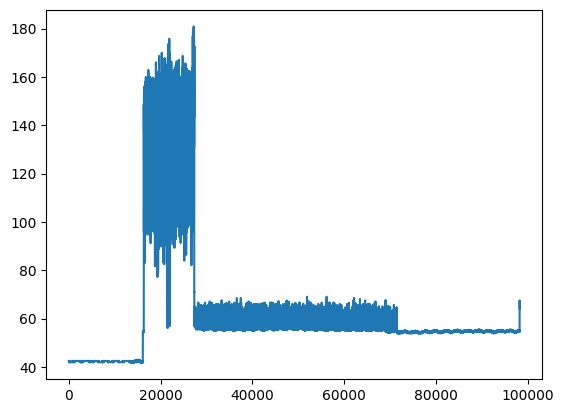

In [18]:
list_of_filenames = [('./data/card_name_v100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_2/gpu0.log', 2),
                     ('./data/card_name_v100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_30/gpu0.log', 30),
                     ('./data/card_name_v100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_70/gpu0.log', 70)]


for filename, epoch in list_of_filenames:
   fig, ax = plt.subplots()
   df = read_energy(filename)
   label = f'Epoch {epoch}'
   df.rename(columns = {'0 power_draw W':label}, inplace=True)
   energy = df[['time', label]]
   # display(energy)
   sns.lineplot(energy)
   export_figure('Time', 'Energy', filename)
   plt.show()

In [20]:
err_dir_path = Shell.map_filename('./data/card_name_v100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_2/').path
full_dir_path = None

for file in os.listdir(err_dir_path):
   if file.endswith(".err"):
      print(os.path.join(err_dir_path, file))
      full_dir_path = os.path.join(err_dir_path, file)

C:\Users\stapm\cm\mlcommons\benchmarks\earthquake\analysis\energy\data\card_name_v100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_2\dje5dj-44848919.err


In [29]:
content = readfile(full_dir_path,
                       encoding='utf-8').splitlines()
# print(content[0:1])

# headline = '# csv,timer,status,time,sum,start,tag,msg,uname.node,user,uname.system,platform.version'
headline = Shell.cm_grep(content, '# csv,timer')[0]
csv_lines = Shell.cm_grep(content, '# csv')
csv_lines = Shell.cm_grep(csv_lines, 'Linux')
csv_lines.insert(0, headline)

print("\n".join(csv_lines))

content = "\n".join(csv_lines)
content = content.replace(', ', ',')
timer_df = pd.read_csv(io.StringIO(content),sep=',')

# csv,timer,status,time,sum,start,tag,msg,uname.node,user,uname.system,platform.version
# csv,total,failed,None,0.0,2022-11-09 17:05:45,,None,udc-aj36-36,dje5dj,Linux,#1 SMP Wed Feb 23 16:47:03 UTC 2022
# csv,total,ok,13752.481,13752.481,2022-11-09 17:05:45,,None,udc-aj36-36,dje5dj,Linux,#1 SMP Wed Feb 23 16:47:03 UTC 2022
# csv,INIT,ok,0.979,0.979,2022-11-09 17:05:50,,None,udc-aj36-36,dje5dj,Linux,#1 SMP Wed Feb 23 16:47:03 UTC 2022
# csv,EVAL,ok,440.14,440.14,2022-11-09 17:05:51,,None,udc-aj36-36,dje5dj,Linux,#1 SMP Wed Feb 23 16:47:03 UTC 2022
# csv,PLOTS,ok,411.943,411.943,2022-11-09 17:05:52,,None,udc-aj36-36,dje5dj,Linux,#1 SMP Wed Feb 23 16:47:03 UTC 2022
# csv,CELL_READ_DATA,ok,230.647,230.647,2022-11-09 17:05:52,,None,udc-aj36-36,dje5dj,Linux,#1 SMP Wed Feb 23 16:47:03 UTC 2022
# csv,SPACE_FILLING_CURVE,ok,1.075,1.075,2022-11-09 17:05:52,,None,udc-aj36-36,dje5dj,Linux,#1 SMP Wed Feb 23 16:47:03 UTC 2022
# csv,gilbert2d_Graph_Done,ok,0.0,0.0,2022-11-09 17:08:05,,None,udc-aj36-3

In [33]:
df = timer_df.drop(columns=['# csv', 'status', 'sum', 'uname.node', 'user', 'uname.system', 'platform.version', 'msg'])
df

# to do- there are two totals. if time == None then drop the row

,timer,time,start,tag
0,total,None,2022-11-09 17:05:45,NaN
1,total,13752.481,2022-11-09 17:05:45,NaN
2,INIT,0.979,2022-11-09 17:05:50,NaN
3,EVAL,440.14,2022-11-09 17:05:51,NaN
4,PLOTS,411.943,2022-11-09 17:05:52,NaN
...,...,...,...,...
224,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-11-09 20:54:53,NaN
225,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-11-09 20:54:53,NaN
226,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-11-09 20:54:54,NaN
227,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-11-09 20:54:54,NaN


In [36]:
df.loc[df['timer'] == 'INIT']

,timer,time,start,tag
2,INIT,0.979,2022-11-09 17:05:50,NaN


In [37]:
df.loc[df['timer'] == 'PLOTTED_EARTHQUAKE_IMAGES']

,timer,time,start,tag
23,PLOTTED_EARTHQUAKE_IMAGES,0.0,2022-11-09 17:12:43,NaN


In [38]:
df.loc[df['timer'] == 'Predicted_Data_0']

,timer,time,start,tag
24,Predicted_Data_0,0.0,2022-11-09 17:13:25,NaN


In [39]:
df.loc[df['timer'] == 'Predicted_Data_103']

,timer,time,start,tag
127,Predicted_Data_103,0.0,2022-11-09 17:13:26,NaN


In [ ]:
df.loc[df['timer'] == 'RunTFTCustomVersion tft only']